In [394]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as scs
import datetime
import yfinance as yf
import pickle

In [395]:
# Import a dataframe of the S&P 500 
stocks = pd.read_csv('data/stock-list.csv')

In [396]:
stocks.head()

,symbol,security,sector,industry
0,MMM,3M Company,Industrials,Industrial Conglomerates
1,ABT,Abbott Laboratories,Health Care,Health Care Equipment
2,ABBV,AbbVie Inc.,Health Care,Pharmaceuticals
3,ABMD,ABIOMED Inc,Health Care,Health Care Equipment
4,ACN,Accenture plc,Information Technology,IT Consulting & Other Services


In [397]:
stocks.describe()

,symbol,security,sector,industry
count,505,505,505,505
unique,505,505,11,128
top,WYNN,Ameriprise Financial,Industrials,Health Care Equipment
freq,1,1,71,19


In [398]:
np.unique(stocks['sector'])

array(['Communication Services', 'Consumer Discretionary',
       'Consumer Staples', 'Energy', 'Financials', 'Health Care',
       'Industrials', 'Information Technology', 'Materials',
       'Real Estate', 'Utilities'], dtype=object)

In [399]:
np.unique(stocks['industry'])

array(['Advertising', 'Aerospace & Defense',
       'Agricultural & Farm Machinery', 'Agricultural Products',
       'Air Freight & Logistics', 'Airlines', 'Alternative Carriers',
       'Apparel Retail', 'Apparel, Accessories & Luxury Goods',
       'Application Software', 'Asset Management & Custody Banks',
       'Auto Parts & Equipment', 'Automobile Manufacturers',
       'Automotive Retail', 'Biotechnology', 'Brewers', 'Broadcasting',
       'Building Products', 'Cable & Satellite', 'Casinos & Gaming',
       'Commodity Chemicals', 'Communications Equipment',
       'Computer & Electronics Retail', 'Construction & Engineering',
       'Construction Machinery & Heavy Trucks', 'Construction Materials',
       'Consumer Electronics', 'Consumer Finance', 'Copper',
       'Data Processing & Outsourced Services', 'Department Stores',
       'Distillers & Vintners', 'Distributors', 'Diversified Banks',
       'Diversified Chemicals', 'Diversified Support Services',
       'Drug Retail', 

In [400]:
stock_counts_by_sector = stocks.groupby(['sector']).count().reset_index()
stock_counts_by_sector.rename(columns={'symbol': 'symbol_count'}, inplace=True)
stock_counts_by_sector.head()

,sector,symbol_count,security,industry
0,Communication Services,26,26,26
1,Consumer Discretionary,64,64,64
2,Consumer Staples,33,33,33
3,Energy,27,27,27
4,Financials,66,66,66


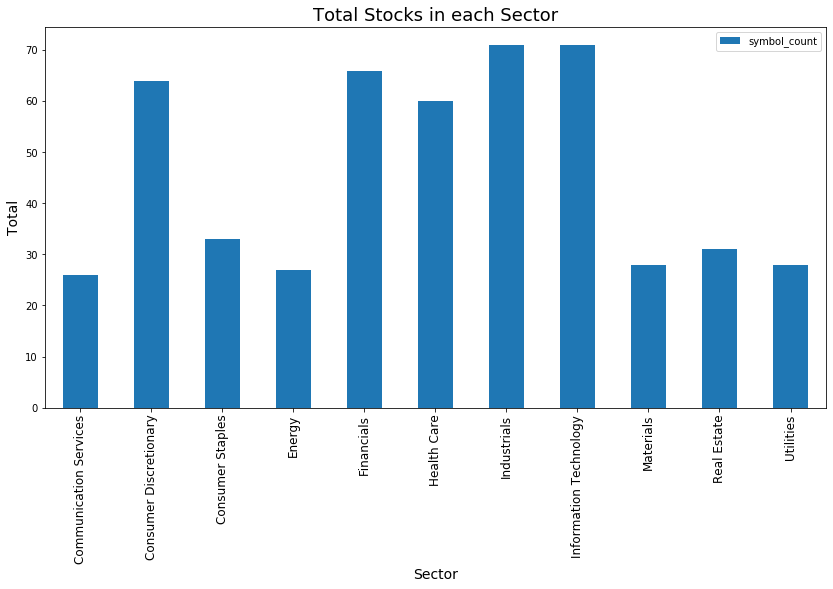

In [565]:
fig, ax = plt.subplots(figsize=(14, 7))
stock_counts_by_sector.plot(ax=ax, kind='bar', x='sector', y='symbol_count')
plt.title("Total Stocks in each Sector", fontsize=18)
plt.ylabel("Total", fontsize=14)
plt.xlabel("Sector", fontsize=14)
plt.xticks(fontsize=12)
plt.savefig('total_stocks_per_sector.png')

In [402]:
symbols = np.array(stocks['symbol'])
symbols

array(['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP',
       'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN',
       'ALGN', 'ALLE', 'AGN', 'ADS', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO',
       'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'T', 'AMT',
       'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'ANTM',
       'AON', 'AOS', 'APA', 'AIV', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ARNC',
       'ANET', 'AJG', 'AIZ', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY',
       'BKR', 'BLL', 'BAC', 'BK', 'BAX', 'BDX', 'BRK.B', 'BBY', 'BIIB',
       'BLK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR',
       'BF.B', 'CHRW', 'COG', 'CDNS', 'CPB', 'COF', 'CPRI', 'CAH', 'KMX',
       'CCL', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CTL',
       'CERN', 'CF', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI',
       'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS',
       'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'CXO', 'COP', 

In [403]:
stocks[stocks['sector'] == 'Comm']['industry'].values[0]

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
f'{datetime.date.today().isoformat()}'

In [404]:
stock_counts_by_industry = stocks.groupby(['sector', 'industry'], sort=True).count()
stock_counts_by_industry.to_csv('stock_counts_by_industry.csv')

In [405]:
spy_data = yf.download("SPY", start="2019-01-01", end=f'{datetime.date.today().isoformat()}')

[*********************100%***********************]  1 of 1 completed


In [406]:
spy_data['High'].mean()

294.9548266197229

In [407]:
# compare the beta changes over time 
# calculate percent change
# calculate covariances 
# compare against yfinance
# use rolling window

In [408]:
spy_data = spy_data[['Adj Close']]
spy_data.head()

,Adj Close
Date,
2019-01-02,244.095322
2019-01-03,238.270538
2019-01-04,246.251556
2019-01-07,248.193176
2019-01-08,250.525040


In [409]:
spy_data.rename(columns={'Adj Close': 'spy_close'}, inplace=True)

In [410]:
spy_data.head()

,spy_close
Date,
2019-01-02,244.095322
2019-01-03,238.270538
2019-01-04,246.251556
2019-01-07,248.193176
2019-01-08,250.525040


In [486]:
    def add_symbol_data_to_dataframe(init_df, symbols, start_date="2019-01-01", end_date=datetime.date.today().isoformat()):
      for sym in symbols:
          data = yf.download(sym, start=start_date, end=end_date)
          init_df[f'{sym.lower()}_close'] = data['Adj Close']
      return init_df

    def calculate_beta_for_specific_time_range(init_df, symbols, window=30):
      pct_changes = init_df.pct_change()
      for sym in symbols:
        pct_changes[f'{sym.lower()}_beta'] = pct_changes.rolling(window).cov().unstack()['spy_close'][f'{sym.lower()}_close'] / pct_changes['spy_close'].rolling(window).var()
      return pct_changes


In [487]:
add_symbol_data_to_dataframe(spy_data, SECTOR_ETF_SYMBOLS.keys())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,spy_close,xlb_close,xlc_close,xle_close,xlf_close,xli_close,xlk_close,xlp_close,xlre_close,xlu_close,xlv_close,xly_close
Date,,,,,,,,,,,,
2019-01-02,244.095322,49.405293,41.352737,53.590675,23.338535,62.948280,60.893623,48.849945,29.143776,49.931423,82.882172,97.951782
2019-01-03,238.270538,48.004272,40.660725,53.059170,22.813852,61.032806,57.820469,48.569305,29.278479,49.921822,81.199242,95.830925
2019-01-04,246.251556,49.891754,42.410530,54.864460,23.571728,63.346943,60.383060,49.604755,29.576746,50.661053,83.621490,99.002380
2019-01-07,248.193176,50.066879,42.894939,55.680054,23.600876,63.862274,60.923073,49.537014,29.826906,50.315441,83.942513,101.241051
2019-01-08,250.525040,50.592262,43.616611,56.110756,23.620308,64.737358,61.433632,49.991837,30.346472,50.939468,84.594292,102.360382
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-30,261.649994,45.669998,44.320000,28.620001,21.410000,59.750000,81.900002,55.599998,32.020000,57.740002,88.970001,100.099998
2020-03-31,257.750000,45.040001,44.240002,29.059999,20.820000,59.009998,80.370003,54.470001,31.000000,55.410000,88.580002,98.080002
2020-04-01,246.149994,43.009998,42.480000,27.620001,19.549999,56.349998,76.540001,53.549999,29.120001,52.080002,85.209999,93.699997


In [489]:
betas = calculate_beta_for_specific_time_range(spy_data, SECTOR_ETF_SYMBOLS.keys())

In [490]:
betas[30:]

,spy_close,xlb_close,xlc_close,xle_close,xlf_close,xli_close,xlk_close,xlp_close,xlre_close,xlu_close,...,xlc_beta,xle_beta,xlf_beta,xli_beta,xlk_beta,xlp_beta,xlre_beta,xlu_beta,xlv_beta,xly_beta
Date,,,,,,,,,,,,,,,,,,,,,
2019-02-14,-0.002218,-0.005182,0.003711,0.003547,-0.012214,-0.004664,0.001740,-0.011203,0.003751,-0.001618,...,1.194335,0.965759,0.841952,1.114846,1.496391,0.520964,0.163680,0.284853,0.887420,1.051051
2019-02-15,0.010897,0.013581,0.004350,0.016136,0.021252,0.013389,0.007963,0.009472,0.006036,0.003061,...,1.322266,1.135456,0.848913,1.050182,1.303898,0.606465,0.218487,0.346146,0.919515,1.082866
2019-02-19,0.001731,0.006241,0.001083,0.003025,0.001513,-0.000396,0.000287,0.005152,0.001143,0.005923,...,1.311939,1.213162,0.752914,1.034248,1.293728,0.582175,0.241034,0.289952,0.936920,1.136395
2019-02-20,0.002015,0.017147,-0.003461,0.004222,0.006422,0.004758,0.001149,-0.001831,-0.006279,0.004461,...,1.305515,1.191154,0.768078,1.039586,1.299360,0.606651,0.238348,0.324036,0.949613,1.085843
2019-02-21,-0.003556,-0.003945,-0.009334,-0.015465,-0.005255,-0.004078,0.000430,0.002934,0.001723,0.007284,...,1.286103,1.254194,0.818630,1.038503,1.295596,0.569196,0.181465,0.253122,0.974605,1.064790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-30,0.032476,0.031857,0.036483,0.010237,0.019039,0.014604,0.042117,0.039058,0.025953,0.036997,...,0.910267,1.334657,1.241201,1.095077,1.147512,0.820733,1.078567,1.027765,0.880292,0.942267
2020-03-31,-0.014905,-0.013795,-0.001805,0.015374,-0.027557,-0.012385,-0.018681,-0.020324,-0.031855,-0.040353,...,0.908258,1.329798,1.242284,1.094501,1.148195,0.822015,1.080203,1.030093,0.879846,0.942551
2020-04-01,-0.045005,-0.045071,-0.039783,-0.049553,-0.060999,-0.045077,-0.047655,-0.016890,-0.060645,-0.060097,...,0.907210,1.318337,1.243444,1.092217,1.146731,0.814007,1.090015,1.041090,0.880751,0.942692


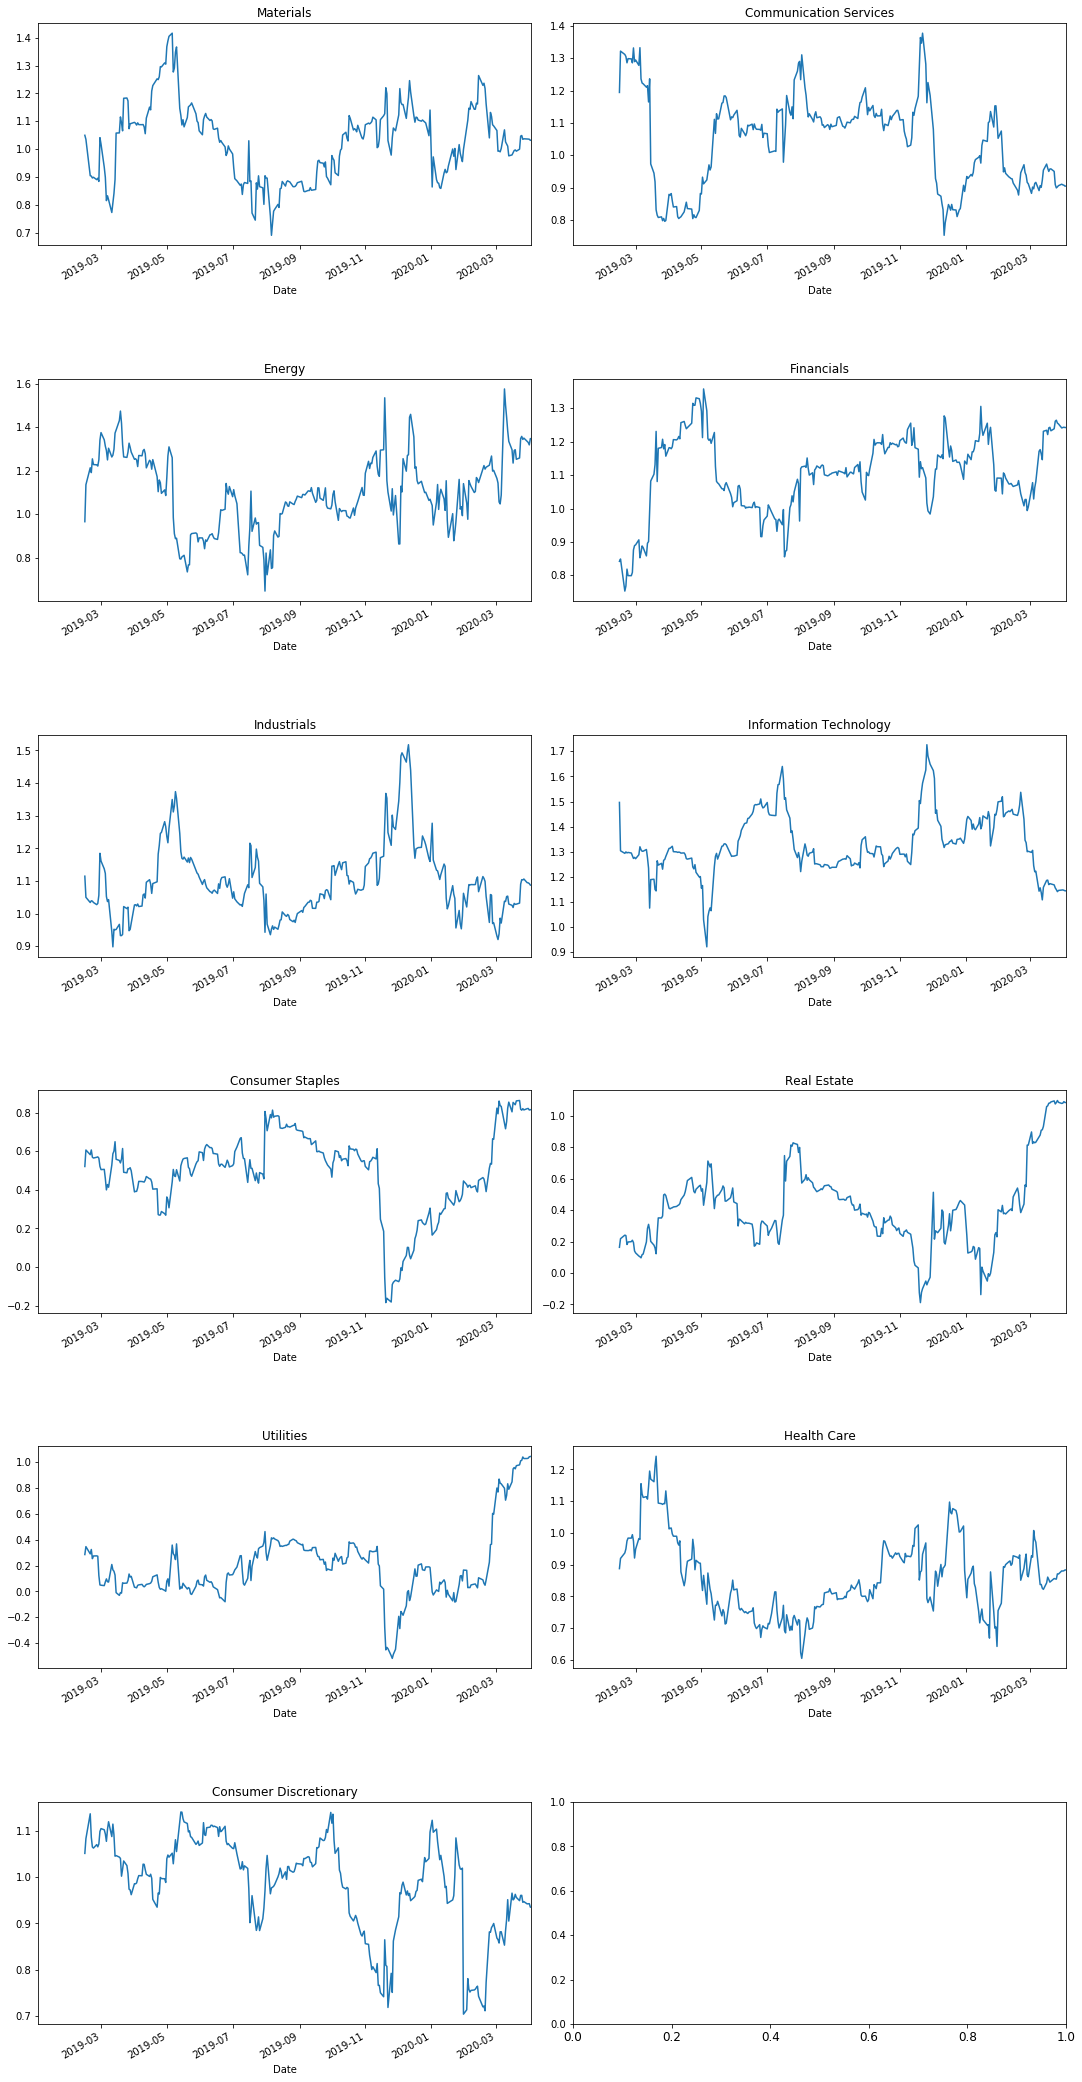

In [564]:
      fig, axs = plt.subplots(6, 2, figsize=(15, 35))
      fig.tight_layout()
      plt.subplots_adjust(hspace=.6)
      plt.xticks(fontsize=12)
      for sym, ax in zip(SECTOR_ETF_SYMBOLS.keys(), axs.flatten()):
        betas[f'{sym.lower()}_beta'].plot(ax=ax, title=SECTOR_ETF_SYMBOLS[sym])
      plt.savefig('beta_for_each_sector_since_2019.png')